<a href="https://colab.research.google.com/github/Nastya880/cuda/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №1**

**Основы работы с технологией CUDA. Гибридное программирование. Работа с глобальной памятью**


Контрольные вопросы

1.	Что такое гибридное программирование?

```
Гибридное программирование - это написание программы для гетерогенной
аппаратной вычислительной структуры, например, для системы, состоящей
из центрального процессора CPU и графического ускорителя GPU.
```

2.	Что такое CUDA?


```
CUDA (Compute Unified Device Architecture) – 
- технология (библиотеки и расширенный Cи), предназначенная для разработки
приложений для массивно-параллельных вычислительных устройств, заметно облегчает
написание GPGPU (General Purposed Graphical Processing Unit)-приложений;
- программно-аппаратная архитектура.

```


3.	Основные положения программной модели CUDA? 


```
GPU (Graphical Processing Unit, device) – это вычислительное устройство,
которое:
-	состоит из массива потоковых мультипроцессоров (streaming 
     multiprocessor, SM);
-	является сопроцессором к центральному процессору CPU (host);
-	имеет собственную память (DRAM);
-	выполняет одновременно большое количество нитей.

```


4.	Из чего состоит программный стек CUDA?


```
CPU (Application -> CUDA Libraries, CUDA RunTime, CUDA Drver) -> GPU
```


5.	Что такое ядро в CUDA?


```
Ядро (kernel) – это функция, которая работает на GPU и которая 
может быть вызвана только с CPU. Ядро выполняется на сетке из блоков.
```


6.	Какие расширения языка Си вводятся в CUDA? 


```
Вводимые в CUDA расширения языка Си состоят из: 
-	спецификаторов функций, показывающих, где будет выполняться функция и откуда она может быть вызвана;  
-	спецификаторов переменных, задающих тип памяти, используемый для данных переменных;
-	 директивы для запуска ядра из кода;
-	встроенные переменные, содержащие информацию о текущей нити;
-	дополнительные типы данных.

```


7.	Какие встроенные переменные поддерживаются в CUDA и для чего они нужны?


```
В CUDA поддерживаются следующие встроенные переменные,
содержащие информацию о текущей нити (рисунок 3):
-	dim3  gridDim;  // размер сетки
-	uint3 blockIdx; // индекс текущего блока в сетке
-	dim3  blockDim; // размер блока 
-	uint3 threadIdx; // индекс текущей нити в блоке
-	int   warpSize; // размер warp’а
Встроенные переменные доступны в функции ядра.

```


8.	Какие ограничения вводятся на функции, выполняемые на GPU? 


```
- нельзя брать адрес функции (за исключением __global__);
-	не поддерживается рекурсия;
-	не поддерживаются static-переменные внутри функции;
-	не поддерживается переменное число входных аргументов.

```
9. МОЙ ДОП	Какие ограничения вводятся на спецификаторы переменных, выполняемые на GPU? 


```
-	нельзя применять к полям структуры (struct или union);
-	не могут быть extern;
-	запись в __constant__  может выполнять только CPU через специальные функции;
-	__shared__ - переменные не могут инициализироваться при объявлении.
```


**Задание 1. В MS Visual Studio создать проект CUDA VS Wizard. Ознакомиться и запустить программу «Hello world». Получить информацию об устройстве. Измерить время выполнения программы. Результаты занести в отчёт. Запустить программу «Hello world» на всех мультипроцессорах в GPU. Измерить время выполнения программы. Результаты занести в отчёт.**

In [ ]:
#include <cstdio>
int main() {
    printf("Hello, world!\n");
    return 0;
}

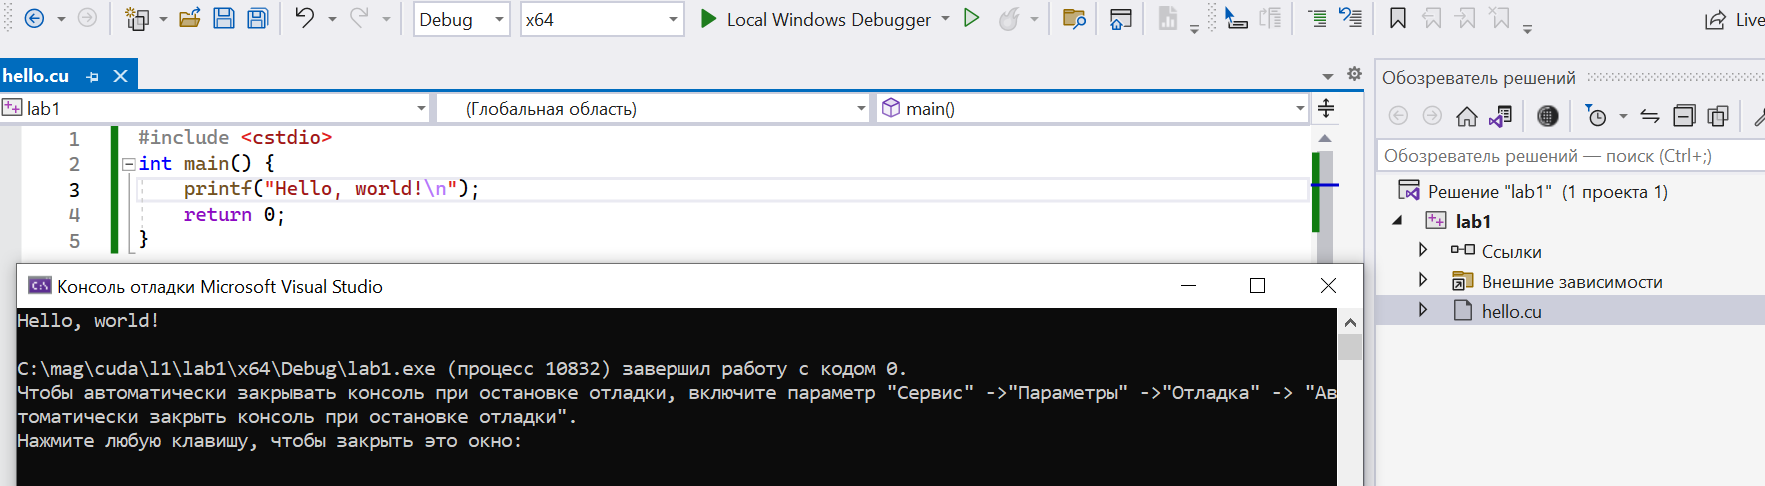

In [ ]:
#include <cstdio>

__global__ void kernel()
{
}

int main()
{
    kernel << <1, 1 >> > ();
    printf("Hello, world!\n");
    return 0;
}

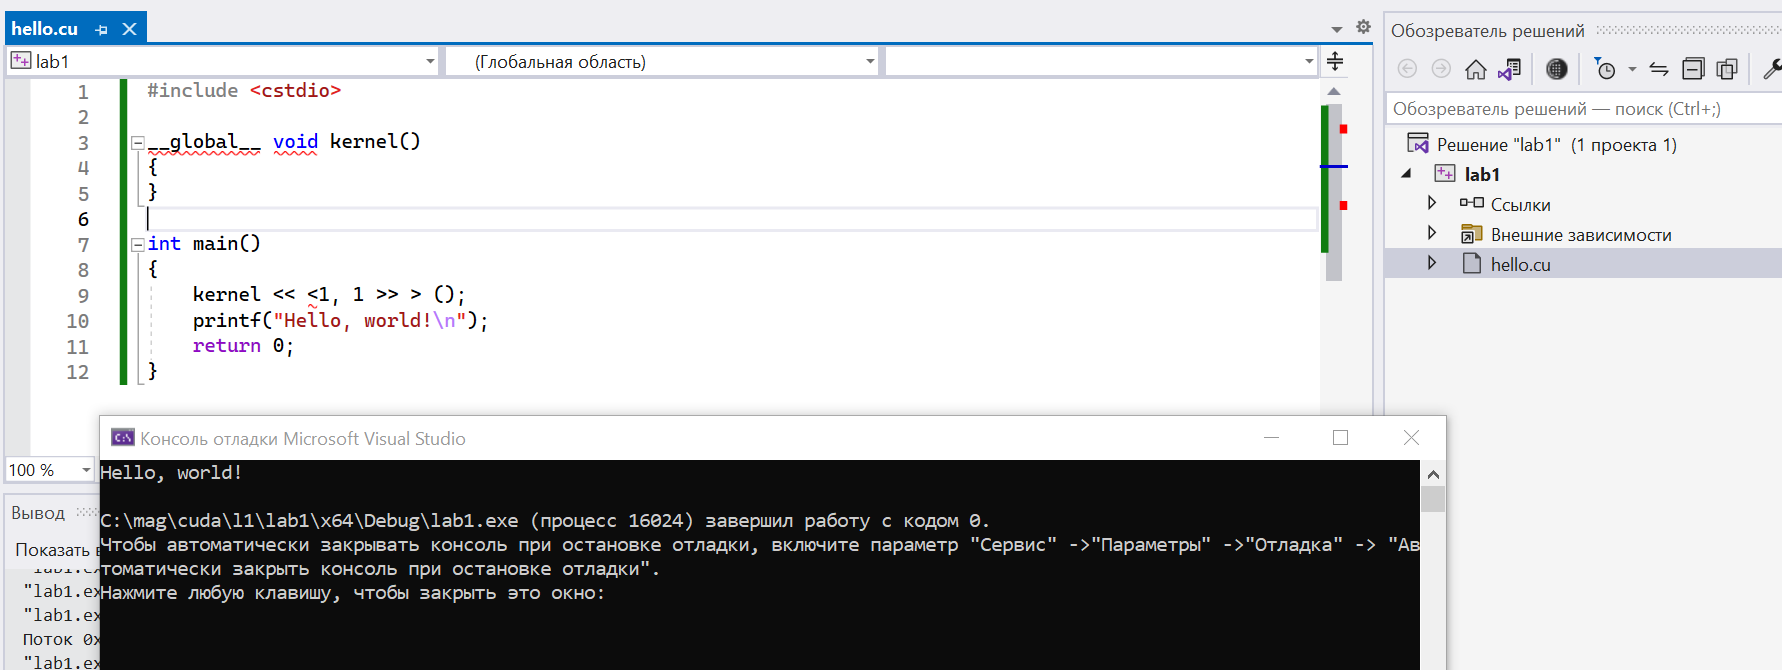

In [ ]:
#include <cstdio>
#include <cuda_runtime.h>
#include <chrono>
int main (int argc, char * argv [] )
{
    int deviceCount;
    cudaDeviceProp devProp{};
    cudaGetDeviceCount ( &deviceCount );
    printf ( "Found %d devices\n", deviceCount );
    for ( int device = 0; device < deviceCount; device++)
    {cudaGetDeviceProperties ( &devProp, device );
        printf ("Device %d\n", device );
        printf ("Compute capability : %d.%d\n", devProp.major, devProp.minor);
        printf ("Name : %s\n", devProp.name);
        // Полный объем глобальной памяти в Mбайтах:
        printf ("Total Global Mem: %lu\n", (devProp.totalGlobalMem/(1024*1024)));
        printf ("Shared memory per block: %zu\n" , devProp.sharedMemPerBlock );
        printf ("Registers per block : %d\n", devProp.regsPerBlock);
        printf ("Warp size : %d\n", devProp.warpSize);
        printf ("Max threads per block: %d\n", devProp.maxThreadsPerBlock);
        printf ("Total constant memory: %zu\n", devProp.totalConstMem);
        printf ("Clock Rate : %d\n", devProp.clockRate);
        printf ("Texture Alignment : %zu\n", devProp.textureAlignment);
        printf ("Device Overlap : %d\n", devProp.deviceOverlap);
        printf ("Multiprocessor Count: %d\n", devProp.multiProcessorCount);
        printf ("Max Threads Dim : %d %d %d\n", devProp.maxThreadsDim[0],
                devProp.maxThreadsDim[1], devProp.maxThreadsDim[2] );
        printf ("Max Grid Size : %d %d %d\n", devProp.maxGridSize [0],
                devProp.maxGridSize [1], devProp.maxGridSize [2]);
        printf("");
    }
    return 0;
}